In [61]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore') 

In [4]:
housing = pd.read_csv("train.csv")

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
housing.shape

(1460, 81)

In [16]:
round(housing.isnull().sum()/len(housing.index), 2).sort_values(ascending = False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
Id              0.00
Functional      0.00
dtype: float64

In [14]:
len(housing.index)

1460

Removing the columns which are having more than 15 percent of null values

In [18]:
housing = housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 'columns')

In [22]:
round(housing.isnull().sum()/len(housing.index), 2)[round(housing.isnull().sum()/len(housing.index), 2)>0.00].sort_values(ascending = False)

GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

In [23]:
housing.YearBuilt.max()

2010

In [25]:
housing['YearBuilt_old'] = housing.YearBuilt.max()-housing.YearBuilt

In [26]:
housing['YearBuilt_old'].head()

0     7
1    34
2     9
3    95
4    10
Name: YearBuilt_old, dtype: int64

In [27]:
housing['YearRemodAdd_old'] = housing.YearRemodAdd.max()-housing.YearRemodAdd

In [28]:
housing['GarageYrBlt_old'] = housing.GarageYrBlt.max()-housing.GarageYrBlt

In [29]:
housing['YrSold_old'] = housing.YrSold.max()-housing.YrSold

In [30]:
housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_old','YearRemodAdd_old',
             'GarageYrBlt_old','YrSold_old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_old,YearRemodAdd_old,GarageYrBlt_old,YrSold_old
765,2008,2008,2008.0,2008,2,2,2.0,2
192,1999,1999,1999.0,2009,11,11,11.0,1
783,1978,1978,1978.0,2009,32,32,32.0,1
1063,1925,1980,1976.0,2006,85,30,34.0,4
961,1977,1995,1977.0,2008,33,15,33.0,2
867,1961,1961,1961.0,2007,49,49,49.0,3
1417,1998,1998,1998.0,2009,12,12,12.0,1
1291,1972,1972,1972.0,2009,38,38,38.0,1
705,1930,1950,NaN,2010,80,60,NaN,0
906,2006,2006,2006.0,2007,4,4,4.0,3


In [31]:
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [32]:
housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_old,YearRemodAdd_old,GarageYrBlt_old,YrSold_old
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,10,10,10.0,2


In [33]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [34]:
housing.MasVnrType.isnull().sum()

8

Filling the null valuess by None

In [35]:
housing.MasVnrType.fillna('None',inplace=True)

In [37]:
housing.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [38]:
housing.MasVnrType.mode()

0    None
dtype: object

In [40]:
housing.MasVnrArea.value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [42]:
housing.MasVnrArea.isnull().sum()

8

Filling the null values of the MasVnrArea with the mean value.

In [44]:
housing.MasVnrArea.fillna(housing.MasVnrArea.mean(), inplace = True)

In [45]:
housing.MasVnrArea.isnull().sum()

0

In [46]:
housing.BsmtQual.isnull().sum()

37

In [47]:
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Filling the basement quality null values with None as the null values will indicate that there is no basement.

In [48]:
housing.BsmtQual.fillna('NA',inplace=True)

In [49]:
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [51]:
housing.BsmtQual.isnull().sum()

0

Filling the null values as NA in the following columns as the null values are indicating that there is absence of that feature in that.

In [52]:
housing.BsmtCond.fillna('NA',inplace=True)
housing.BsmtExposure.fillna('NA',inplace=True)
housing.BsmtFinType1.fillna('NA',inplace=True)
housing.BsmtFinType2.fillna('NA',inplace=True)
housing.GarageType.fillna('NA',inplace=True)
housing.GarageFinish.fillna('NA',inplace=True)
housing.GarageQual.fillna('NA',inplace=True)
housing.GarageCond.fillna('NA',inplace=True)

In [53]:
housing.GarageYrBlt_old.value_counts()

5.0      65
4.0      59
6.0      53
7.0      50
3.0      49
         ..
104.0     1
77.0      1
102.0     1
83.0      1
110.0     1
Name: GarageYrBlt_old, Length: 97, dtype: int64

In [54]:
housing.GarageYrBlt_old.isnull().sum()

81

Imputing the null values in the Garage year built column as -1, because these rows have no Garage present.

In [55]:
housing.GarageYrBlt_old.fillna(-1,inplace=True)

In [56]:
housing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [57]:
housing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Removing the 'Street', 'Utilities', 'Id' columns as these are explaning the least varience.

In [58]:
housing = housing.drop(['Street', 'Utilities', 'Id'], axis = 'columns')

In [59]:
# Seeing the numerical columns only
housing[list(housing.dtypes[housing.dtypes != 'object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_old,YearRemodAdd_old,GarageYrBlt_old,YrSold_old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


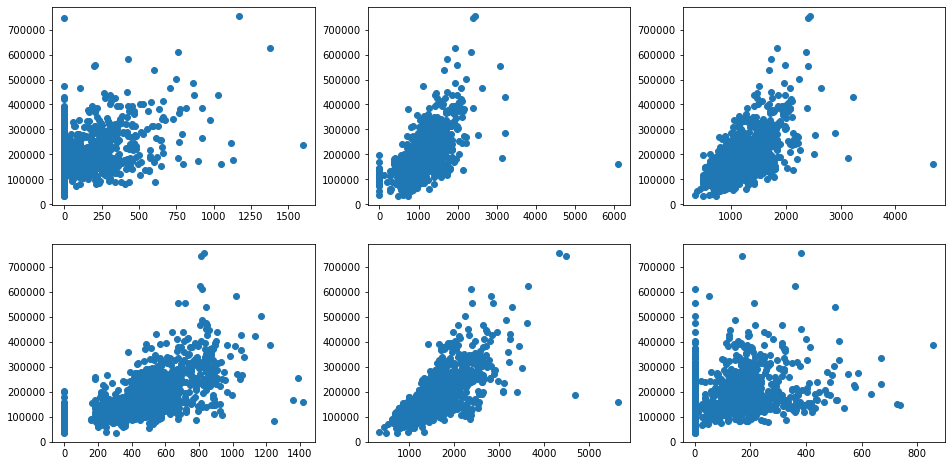

In [62]:
# Ploting various house sales price with various numerical columns
plt.figure(figsize = (16, 8))
plt.subplot(2,3,1)
plt.scatter(housing.MasVnrArea, housing.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housing.TotalBsmtSF, housing.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing['GarageArea'],housing.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing['GrLivArea'],housing.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)

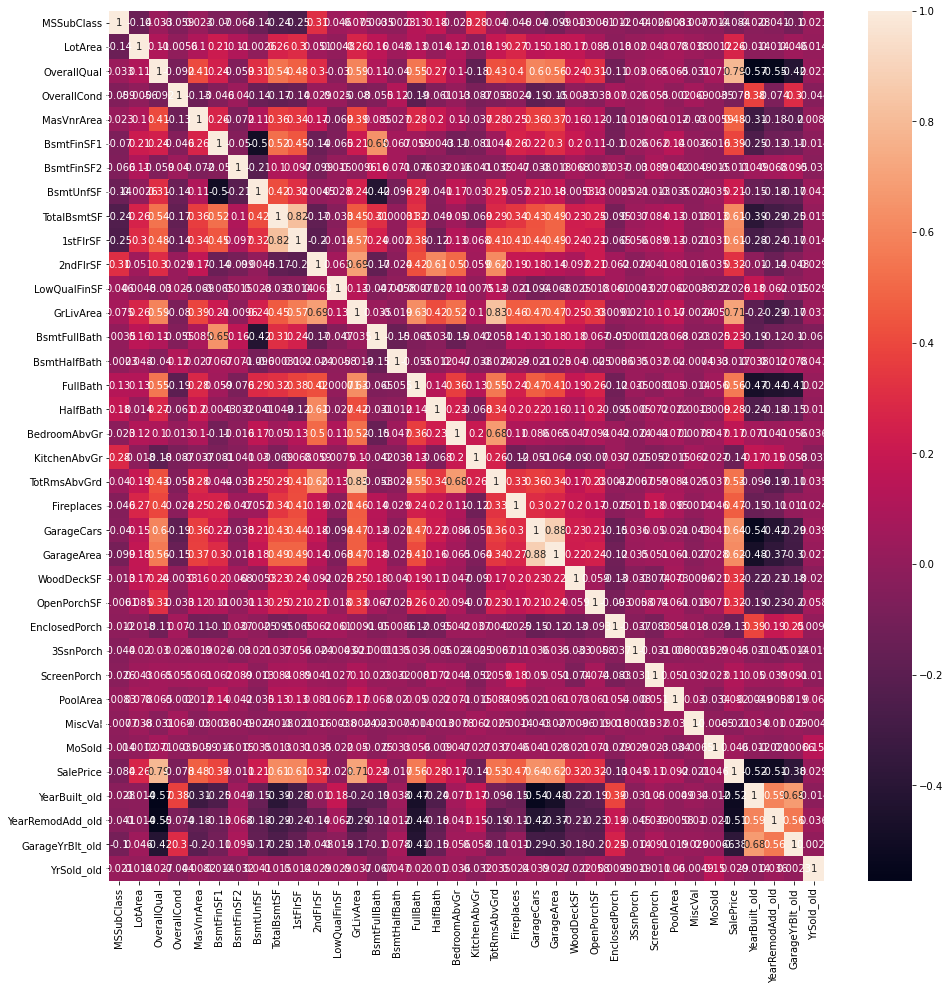

In [63]:
#Plotting the correlation heat map of various numeric columns
plt.figure(figsize=(16,16))
sns.heatmap(housing[list(housing.dtypes[housing.dtypes!='object'].index)].corr(),annot=True,)
plt.show()

In [64]:
housing.shape

(1460, 72)

In [65]:
num_col = list(housing.dtypes[housing.dtypes!='object'].index)

In [66]:
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_old',
 'YearRemodAdd_old',
 'GarageYrBlt_old',
 'YrSold_old']

In [67]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']

Dropping the outliers in the numerical columns


In [68]:
def Drop_Outliers(x):
    list = []
    for col in num_col:
        q1 = x[col].quantile(.25)
        q3 = x[col].quantile(.90)
        IQR = q3 - q1
        x= x[(x[col]>= (q1-(1.5*IQR)))& (x[col]<= (q3+(1.5*IQR)))]
    return x
housing = Drop_Outliers(housing)

In [69]:
housing.shape

(1135, 72)

In [70]:
# Getting all the object with the dtype as objects
list(housing.dtypes[housing.dtypes=='object'].index)

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [71]:
# Creating the dummy variable of the columns having dtype as Objects
dummy_col = pd.get_dummies(housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

In [72]:
# Merging the dummy_col data set into Housing
housing = pd.concat([housing, dummy_col], axis = 'columns')

In [86]:
#Dropping the columns for which dummy variable is created
housing = housing.drop(['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'], axis = 'columns')

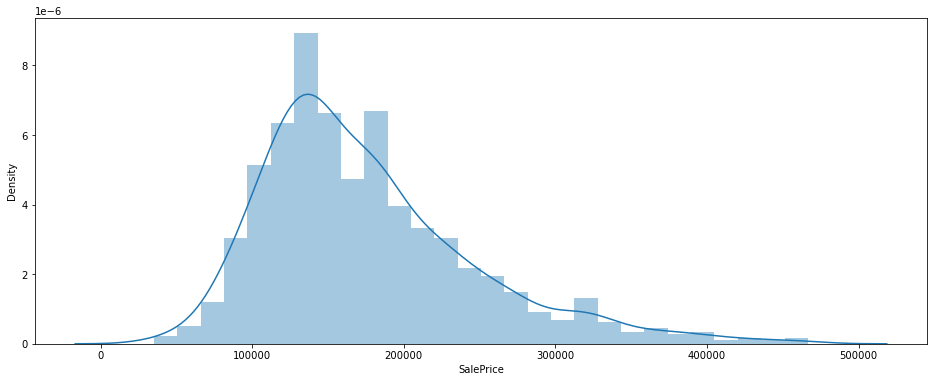

In [87]:
# Plotting the distribution of sales price columns
plt.figure(figsize = (16,6))
sns.distplot(housing.SalePrice)
plt.show()

The Distribution plot is seeing as similar to the normal distribution

In [88]:
# Spliting the train and test data
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

In [89]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

In [90]:
# Scaling and transforming the numerical columns
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [91]:
# Creating X_train and y_train data set. The target variable is Sale Price
y_train = df_train.pop('SalePrice')
X_train = df_train

In [92]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [93]:
len(X_train.columns)

228

## Applying Linear Regression model

In [104]:
# Applying Linear Regression model with rfe having parameters equal to 30
lm =LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 30)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [105]:
# Creating the rfe Score
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))

In [106]:
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [107]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status == True].Column_Names)
rfe_sel_columns

['GrLivArea',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_NA',
 'BsmtQual_TA',
 'BsmtCond_NA',
 'BsmtExposure_Gd',
 'BsmtFinType1_NA',
 'BsmtFinType2_NA',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'GarageQual_Fa',
 'ExterCond_Fa',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Condition1_RRNn',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Fin',
 'RoofMatl_Tar&Grv',
 'Exterior1st_CemntBd',
 'Heating_OthW',
 'Functional_Maj2',
 'SaleType_CWD',
 'SaleType_Con']

In [108]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [109]:
X_train.shape

(794, 30)

In [110]:
lm = Lasso(alpha = 0.001)
lm.fit(X_train, y_train)

y_train_predict = lm.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_predict))

y_test_predict = lm.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_predict))

0.880609134969585
0.7893818101195648


In [111]:
model_parameter = list(lm.coef_)

In [112]:
model_parameter.insert(0, lm.intercept_)

In [113]:
model_parameter = [round(x, 3) for x in model_parameter]

In [114]:
col = df_train.columns
col.insert(0, 'constant')

Index(['constant', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

In [115]:
list(zip(col, model_parameter))

[('MSSubClass', 1.444),
 ('LotArea', 0.438),
 ('OverallQual', -1.012),
 ('OverallCond', -0.609),
 ('MasVnrArea', -0.778),
 ('BsmtFinSF1', -0.943),
 ('BsmtFinSF2', -0.408),
 ('BsmtUnfSF', 0.53),
 ('TotalBsmtSF', -0.006),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', -1.061),
 ('LowQualFinSF', -0.562),
 ('GrLivArea', -0.878),
 ('BsmtFullBath', -0.291),
 ('BsmtHalfBath', -0.393),
 ('FullBath', -0.63),
 ('HalfBath', 0.431),
 ('BedroomAbvGr', 0.454),
 ('KitchenAbvGr', -0.313),
 ('TotRmsAbvGrd', 0.442),
 ('Fireplaces', 0.0),
 ('GarageCars', -0.341),
 ('GarageArea', -0.43),
 ('WoodDeckSF', -0.226),
 ('OpenPorchSF', -0.482),
 ('EnclosedPorch', -0.039),
 ('3SsnPorch', 0.296),
 ('ScreenPorch', -0.285),
 ('PoolArea', -0.281),
 ('MiscVal', 0.635),
 ('MoSold', 0.502)]

In [116]:
# Finding the optimum value of alpha using the KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [117]:
# Finding the r2 value for different values of alpha
hyper_param = {'alpha':[0.001, 0.01, 0.05, 0.1, 1.0, 5.0, 20.0, 500, 1000]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,
                       param_grid = hyper_param,
                       scoring = 'r2',                    
                       verbose = 1,
                       return_train_score = True,
                       cv = folds)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1.0, 5.0, 20.0, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [118]:
cv_result_1 = pd.DataFrame(model_cv.cv_results_)
cv_result_1['param_alpha'] = cv_result_1['param_alpha'].astype('float32')
cv_result_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007161,0.001576,0.003790,0.001657,0.001,{'alpha': 0.001},0.852621,0.913285,0.889763,0.837868,...,0.879452,0.885428,0.887796,0.881344,0.884470,0.882965,0.877389,0.876725,0.881259,0.003725
1,0.005455,0.001289,0.002582,0.001941,0.010,{'alpha': 0.01},0.752507,0.856829,0.836298,0.803806,...,0.810799,0.815582,0.821125,0.816158,0.811621,0.816129,0.807921,0.808217,0.813115,0.004316
2,0.004394,0.002763,0.002752,0.002108,0.050,{'alpha': 0.05},0.624942,0.674983,0.626973,0.680454,...,0.645764,0.654091,0.650593,0.657468,0.654430,0.661010,0.645516,0.639212,0.650110,0.007125
3,0.004347,0.002682,0.003415,0.002963,0.100,{'alpha': 0.1},0.573092,0.621844,0.575312,0.649563,...,0.598519,0.596189,0.600237,0.599940,0.606530,0.604938,0.590459,0.584751,0.597351,0.006368
4,0.003897,0.002980,0.003215,0.002261,1.000,{'alpha': 1.0},-0.008032,-0.001507,-0.026886,-0.000421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


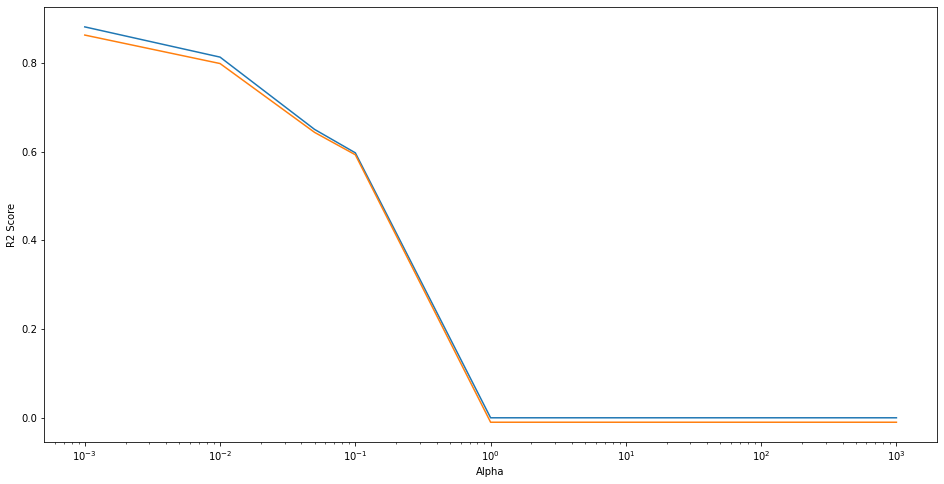

In [119]:
plt.figure(figsize = (16, 8))
plt.plot(cv_result_1['param_alpha'], cv_result_1['mean_train_score'])
plt.plot(cv_result_1['param_alpha'], cv_result_1['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [120]:
# Finding the best alpha value
model_cv.best_params_

{'alpha': 0.001}

In [121]:
# Imputing the best alpha value in the Lasso model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.880609134969585
0.7893818101195648


In [122]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [123]:
#Finding the important feature and there coefficient values
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,1.443920
29,MiscVal,0.635155
7,BsmtUnfSF,0.529991
30,MoSold,0.502469
17,BedroomAbvGr,0.454305
19,TotRmsAbvGrd,0.441680
1,LotArea,0.438370
16,HalfBath,0.430827
26,3SsnPorch,0.295750
9,1stFlrSF,-0.000000


## Appliying Ridge Model

In [124]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8839769430863429
0.7839888641157919


In [125]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.05, 0.1, 1.0, 5.0, 20.0, 500, 1000]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1.0, 5.0, 20.0, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [126]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005486,0.001742,0.003406,0.000981,0.001,{'alpha': 0.001},0.868188,0.912588,0.892278,0.833741,...,0.882342,0.888506,0.890741,0.884482,0.887807,0.885591,0.880545,0.880312,0.884462,0.003575
1,0.004475,0.001730,0.003043,0.000649,0.010,{'alpha': 0.01},0.868112,0.912738,0.892284,0.833804,...,0.882341,0.888505,0.890741,0.884481,0.887806,0.885591,0.880545,0.880311,0.884461,0.003576
2,0.004906,0.001863,0.001198,0.001660,0.050,{'alpha': 0.05},0.867775,0.913324,0.892309,0.834078,...,0.882330,0.888494,0.890731,0.884470,0.887794,0.885585,0.880533,0.880299,0.884450,0.003576
3,0.003082,0.002709,0.002911,0.002107,0.100,{'alpha': 0.1},0.867354,0.913904,0.892334,0.834407,...,0.882299,0.888463,0.890702,0.884439,0.887760,0.885568,0.880502,0.880264,0.884419,0.003579
4,0.003897,0.001971,0.002843,0.002403,1.000,{'alpha': 1.0},0.860452,0.914271,0.891969,0.838740,...,0.880423,0.886557,0.888952,0.882595,0.885761,0.884218,0.878605,0.878289,0.882568,0.003653


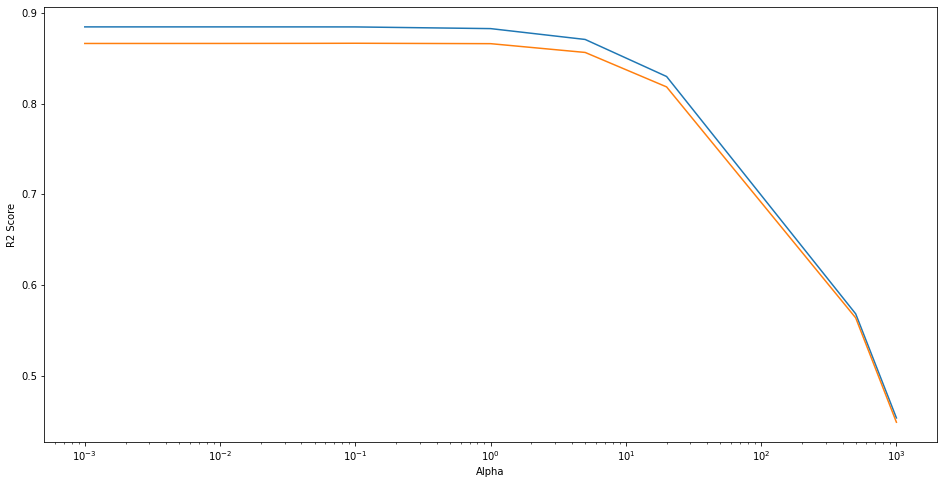

In [127]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [128]:
# Checking the best Alpha value
model_cv.best_params_

{'alpha': 0.1}

In [129]:
# Imputing the best alpha value in the Ridge model
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8839398686924692
0.7850543079454466


In [130]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [131]:
# Getting the important feature and there coefficient value for the Ridge model
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,1.482710
30,MoSold,1.220750
29,MiscVal,0.997150
7,BsmtUnfSF,0.537272
19,TotRmsAbvGrd,0.531430
16,HalfBath,0.483441
17,BedroomAbvGr,0.463661
1,LotArea,0.431445
26,3SsnPorch,0.374745
20,Fireplaces,0.345178


In [132]:
# Finnaly deciding the Lasso model and calculating the r2 value with the optimum alpha value
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.880609134969585
0.7893818101195648
